In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Apple Mobility Trends Dataset
- AppleMobilityTrends contains data representing the daily change in mobility compared to the start date of 13/01/2020
- For each country/city contained in the dataset distinguishes between driving/transit/walking transpotation types.(some dont have transit data)
- The dataset has 152 countries and 196 cities 
- The data is clean and has no NaN values

In [8]:
DATA_PATH = "data/"
APPLE_MOBILITY_DATASET = DATA_PATH + "applemobilitytrends-2020-04-20.csv.gz"
appleMobilityData = pd.read_csv(APPLE_MOBILITY_DATASET, compression='gzip')
appleMobilityData.head()



,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93


In [9]:
appleMobilityData.isnull().values.any() #no NaN values

False

In [10]:
mobilityItaly  = appleMobilityData.loc[appleMobilityData['region'] == "Italy"]
mobilityItaly

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
65,country/region,Italy,driving,100,102.63,105.41,106.18,114.69,127.45,110.65,...,22.00,12.66,15.13,21.84,23.68,24.21,24.65,22.42,19.40,22.62
66,country/region,Italy,transit,100,100.82,100.40,99.52,107.35,113.33,108.25,...,9.27,8.71,10.25,11.23,11.32,11.20,11.22,10.60,11.38,12.05
67,country/region,Italy,walking,100,102.10,104.86,107.32,122.71,142.38,109.49,...,20.58,11.43,12.05,15.41,17.06,17.77,18.86,19.21,15.37,14.46


In [12]:
#Aggregate daily data into weekly

#How to aggregate daily data for weekly: https://towardsdatascience.com/daily-to-weekly-pandas-c0557b12f052
def new_case_count(state_new_cases):
    first_Monday_found = False
    week_case_count = 0
    week_case_counts = []
    for index, value in state_new_cases.items():
        index_date = pd.to_datetime(index, format='%Y/%m/%d', 
                                    exact = False)
        index_day_of_week = index_date.day_name()
        if not first_Monday_found and index_day_of_week != 'Monday':
            continue
        first_Monday_found = True
        week_case_count += value
        if index_day_of_week == 'Sunday':
            week_case_counts.append(week_case_count/7) #Here added divide by 7 since we want average over week isntead of sum
            week_case_count = 0
    return week_case_counts

mobilityItalyDrivingDates = mobilityItaly.drop(columns = ['geo_type', 'region' ,'transportation_type'], axis = 1)
mobilityItalyDrivingDates.index = ['driving', 'transit', 'walking']
# converting list to DataFrame object
weeklyMobilityDataItaly = pd.DataFrame(new_case_count(mobilityItalyDrivingDates))
weeklyMobilityDataItaly.head(10)

,driving,transit,walking
2020-01-13,109.572857,104.238571,112.694286
2020-01-20,110.798571,105.520000,114.955714
2020-01-27,109.122857,103.200000,117.272857
2020-02-03,111.072857,106.491429,121.074286
2020-02-10,122.731429,118.468571,141.558571
2020-02-17,121.698571,121.125714,142.827143
2020-02-24,93.077143,78.302857,89.464286
2020-03-02,81.771429,58.552857,67.457143
2020-03-09,28.652857,18.112857,23.512857
2020-03-16,18.277143,10.160000,15.248571


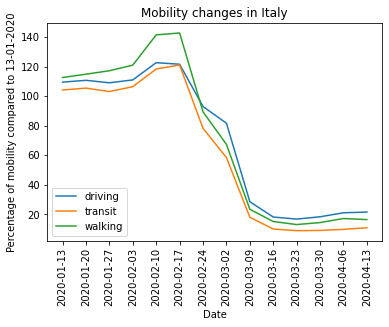

In [13]:

plt.plot(weeklyMobilityDataItaly)
plt.title("Mobility changes in Italy")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
legend = list(weeklyMobilityDataItaly.columns)
plt.legend(legend, loc='lower left')
plt.show()


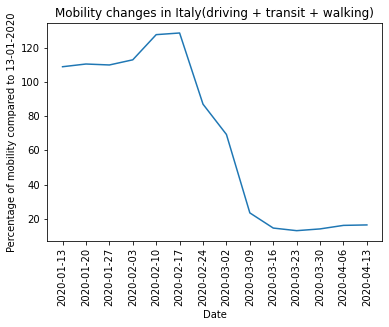

In [14]:
AggWeeklyMobilityDataItaly = weeklyMobilityDataItaly.mean(axis=1) #average over driving+transit+walking

plt.plot(AggWeeklyMobilityDataItaly)
plt.title("Mobility changes in Italy(driving + transit + walking)")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
plt.show()

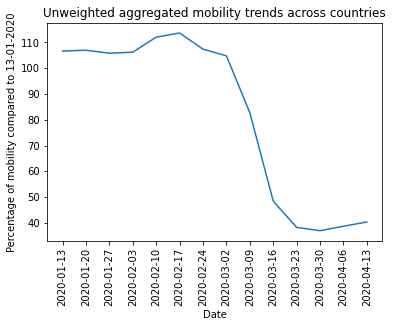

In [15]:
#World mobility over all countries/each country given same weight
mobilityCountries  = appleMobilityData.loc[appleMobilityData['geo_type'] == "country/region"]
mobilityCountriesMixed = mobilityCountries.drop(columns = ['geo_type', 'region', 'transportation_type']);
weeklyMobilityCountriesMixed = pd.DataFrame(new_case_count(mobilityCountriesMixed))
weeklyMobilityCountriesMixed = weeklyMobilityCountriesMixed.mean(axis=1)

plt.plot(weeklyMobilityCountriesMixed)
plt.title("Unweighted aggregated mobility trends across countries")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
plt.show()